# Bias and Variance

Bias: Bias measures how far off the predictions of a model are from the correct values.
High bias can cause an algorithm to miss the relevant relations between features and target outputs (underfitting).
Example: A linear regression model trying to fit a nonlinear relationship between features and target variables.

Variance:Variance measures the variability of model predictions for a given data point.
High variance can cause an algorithm to model the random noise in the training data (overfitting).
Example: A decision tree model with no constraints on its depth might perfectly memorize the training data, resulting in high variance.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

In [2]:
# Generate some nonlinear data
np.random.seed(0)
X = 6 * np.random.rand(100, 1) - 3
y = 0.5 * X**2 + X + 2 + np.random.randn(100, 1)

In [3]:
print(X)

[[ 0.29288102]
 [ 1.2911362 ]
 [ 0.61658026]
 [ 0.2692991 ]
 [-0.4580712 ]
 [ 0.87536468]
 [-0.37447673]
 [ 2.350638  ]
 [ 2.78197656]
 [-0.69935089]
 [ 1.75035023]
 [ 0.17336952]
 [ 0.40826737]
 [ 2.55357983]
 [-2.57378365]
 [-2.4772242 ]
 [-2.87868962]
 [ 1.99571907]
 [ 1.66894051]
 [ 2.22007289]
 [ 2.87171005]
 [ 1.79495139]
 [-0.23112383]
 [ 1.68317506]
 [-2.29035344]
 [ 0.83952613]
 [-2.13988028]
 [ 2.6680135 ]
 [ 0.13108993]
 [-0.51202836]
 [-1.41266633]
 [ 1.64540214]
 [-0.26309801]
 [ 0.41060369]
 [-2.8872612 ]
 [ 0.70581298]
 [ 0.67257434]
 [ 0.70160398]
 [ 2.66248847]
 [ 1.09092179]
 [-0.8429526 ]
 [-0.37780828]
 [ 1.18578718]
 [-2.63864717]
 [ 1.00060029]
 [ 1.02382722]
 [-1.73770463]
 [-2.22644221]
 [-1.10742989]
 [-0.81773537]
 [ 0.42118062]
 [-0.36839092]
 [ 2.93024303]
 [-2.38773114]
 [-1.74673946]
 [-2.03214289]
 [ 0.91864995]
 [-1.48025038]
 [-0.20213536]
 [-1.53344645]
 [-2.0461825 ]
 [-2.33774915]
 [ 0.93797754]
 [-2.17090229]
 [-1.82050583]
 [-0.78764898]
 [ 1.92595

In [4]:
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [6]:
print(X_test)

[[ 1.15483272]
 [-2.38773114]
 [ 2.85875679]
 [ 1.02382722]
 [ 1.00060029]
 [ 1.09092179]
 [-0.23112383]
 [-1.09210092]
 [ 1.75035023]
 [ 0.29288102]
 [ 1.66894051]
 [-1.41266633]
 [ 0.62907312]
 [ 0.41060369]
 [-1.08858629]
 [-0.4580712 ]
 [-1.30315822]
 [-2.27882063]
 [ 0.40826737]
 [ 1.64540214]]


In [9]:
degrees = [1, 2, 10, 20, 40, 60,80]  # Polynomial degrees to try

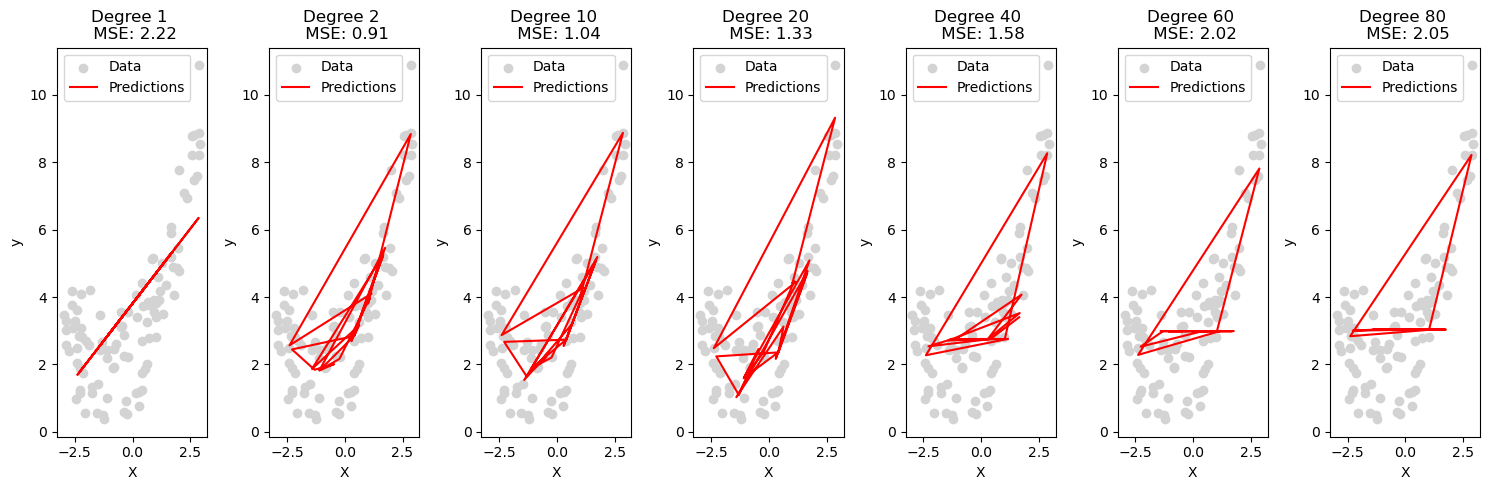

In [10]:
plt.figure(figsize=(15, 5))

for i, degree in enumerate(degrees):
    # Create polynomial features
    polynomial_features = PolynomialFeatures(degree=degree, include_bias=False)
    # Linear regression model
    linear_regression = LinearRegression()
    # Pipeline for polynomial regression
    pipeline = Pipeline([
        ("polynomial_features", polynomial_features),
        ("linear_regression", linear_regression)
    ])
    # Fit model
    pipeline.fit(X_train, y_train)
    
    # Predictions
    y_train_pred = pipeline.predict(X_train)
    y_test_pred = pipeline.predict(X_test)
    
    # Plotting
    plt.subplot(1, len(degrees), i + 1)
    plt.scatter(X, y, color='lightgray', label='Data')
    plt.plot(X_test, y_test_pred, label='Predictions', color='r')
    plt.title(f'Degree {degree} \n MSE: {mean_squared_error(y_test, y_test_pred):.2f}')
    plt.xlabel('X')
    plt.ylabel('y')
    plt.legend()

plt.tight_layout()
plt.show()

This code generates synthetic nonlinear data and fits polynomial regression models of varying degrees (1, 2, and 20) to the data. The resulting plots show how the models fit the data differently. The Mean Squared Error (MSE) on the test set is used as a measure of model performance. The model with degree 20 demonstrates high variance, while the model with degree 1 demonstrates high bias. The model with degree 2 finds a good balance between bias and variance.